In [1]:
import matplotlib.pyplot as plt
plt.rc('font', size=12)
import pandas as pd
import seaborn as sns
import warnings 

from MetricCalculation import Coverage as cov
from MetricCalculation import RuleQuality as RQ

warnings.filterwarnings('ignore')
%matplotlib inline

%load_ext autoreload
%autoreload 2

# Nonprivate 

In [2]:
base = pd.read_csv("../Results/Nonprivate/CoverageSummaryDF.csv")

## Rule Coverage

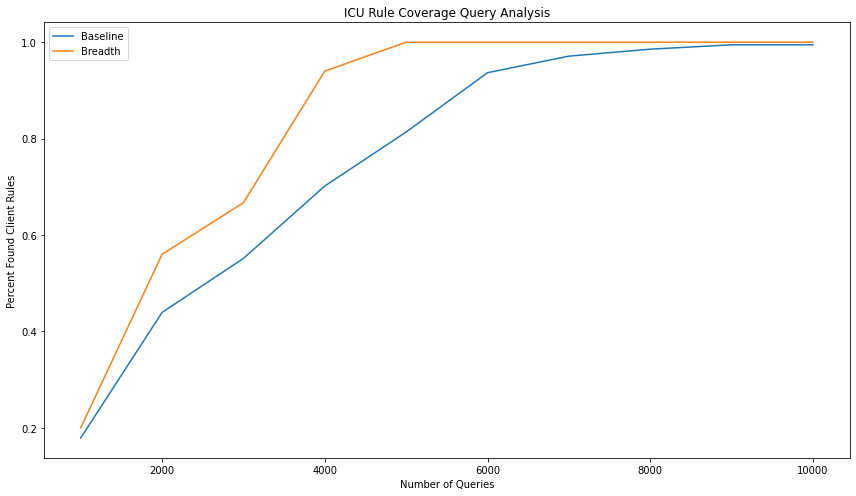

In [3]:
queries = base["Queries"]
icuBase = base["ICU Percent Found Rules B"]
icuCov = base["ICU Percent Found Rules C"]

plt.figure(figsize=(12, 7))
plt.title("ICU Rule Coverage Query Analysis")
plt.plot(queries, icuBase, label='Baseline')
plt.plot(queries, icuCov, label='Breadth')
plt.xlabel("Number of Queries")
plt.ylabel("Percent Found Client Rules")
plt.legend()

plt.tight_layout()
plt.savefig("ICU_Nonpriv_Rule_Coverage.png")

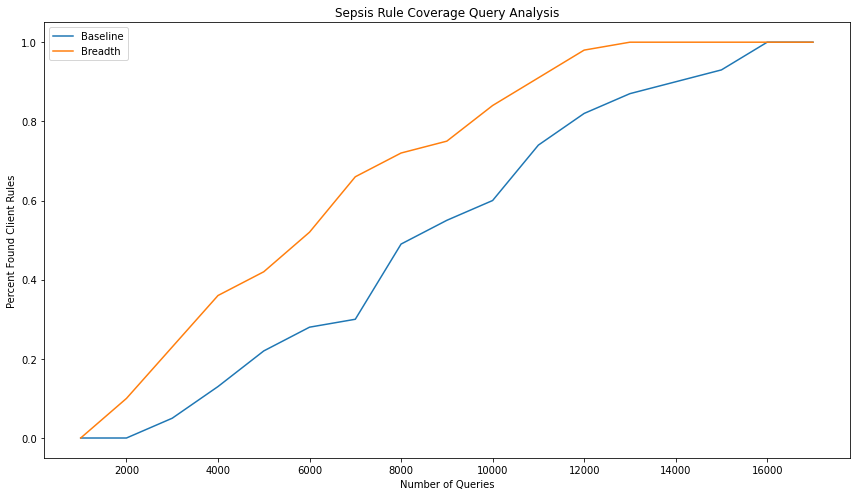

In [4]:
queries = base["Queries"]
icuBase = base["Sepsis Percent Found Rules B"]
icuCov = base["Sepsis Percent Found Rules C"]

plt.figure(figsize=(12, 7))
plt.title("Sepsis Rule Coverage Query Analysis")
plt.plot(queries, icuBase, label='Baseline')
plt.plot(queries, icuCov, label='Breadth')
plt.xlabel("Number of Queries")
plt.ylabel("Percent Found Client Rules")
plt.legend()

plt.tight_layout()
plt.savefig("Sepsis_Nonpriv_Rule_Coverage.png")

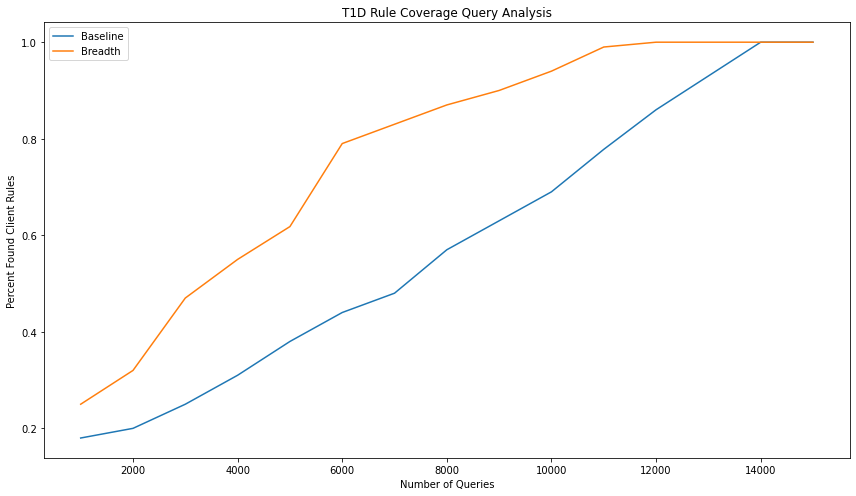

In [5]:
queries = base["Queries"]
icuBase = base["T1D Percent Found Rules B"]
icuCov = base["T1D Percent Found Rules C"]

plt.figure(figsize=(12, 7))
plt.title("T1D Rule Coverage Query Analysis")
plt.plot(queries, icuBase, label='Baseline')
plt.plot(queries, icuCov, label='Breadth')
plt.xlabel("Number of Queries")
plt.ylabel("Percent Found Client Rules")
plt.legend()

plt.tight_layout()
plt.savefig("T1D_Nonpriv_Rule_Coverage.png")

## Structure coverage

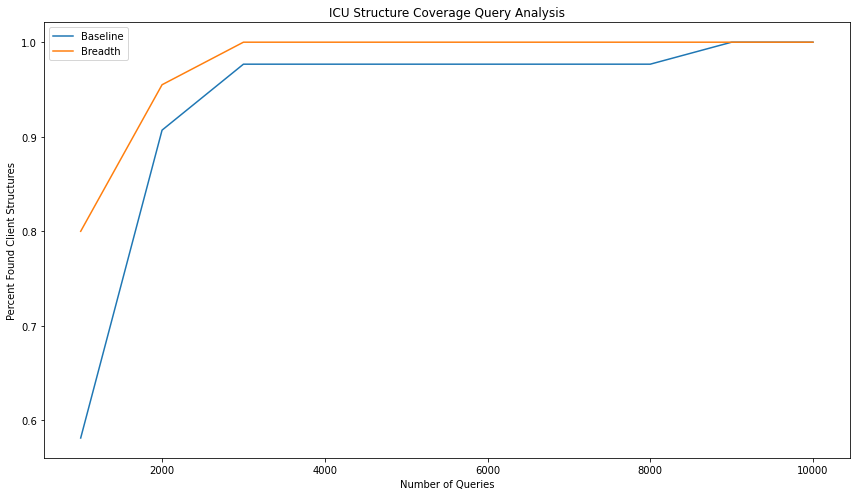

In [6]:
#Plot Structures
queries = base["Queries"]
structsBase = base["ICU Percent Found Structs B"]
structsCov = base["ICU Percent Found Structs C"]

plt.figure(figsize=(12, 7))
plt.title("ICU Structure Coverage Query Analysis")
plt.plot(queries, structsBase, label='Baseline')
plt.plot(queries, structsCov, label='Breadth')
plt.xlabel("Number of Queries")
plt.ylabel("Percent Found Client Structures")
plt.legend()

plt.tight_layout()
plt.savefig("ICU_Nonpriv_Structure_Coverage.png")

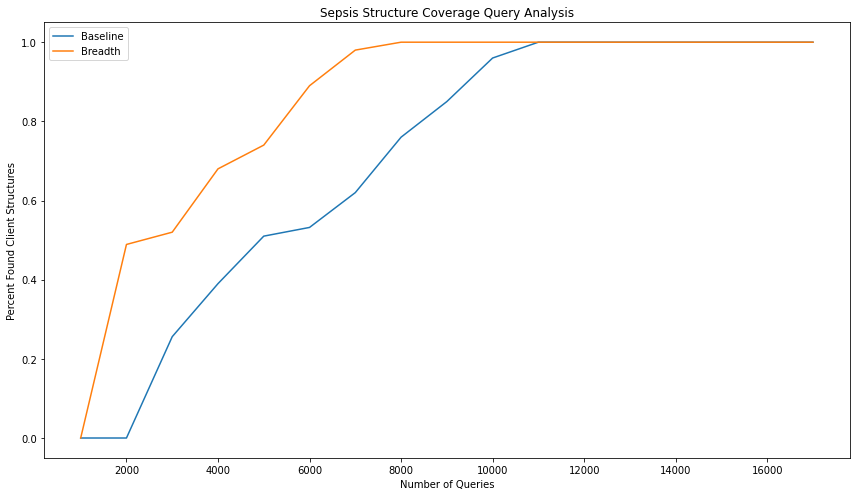

In [7]:
queries = base["Queries"]
structsBase = base["Sepsis Percent Found Structs B"]
structsCov = base["Sepsis Percent Found Structs C"]

plt.figure(figsize=(12, 7))
plt.title("Sepsis Structure Coverage Query Analysis")
plt.plot(queries, structsBase, label='Baseline')
plt.plot(queries, structsCov, label='Breadth')
plt.xlabel("Number of Queries")
plt.ylabel("Percent Found Client Structures")
plt.legend()

plt.tight_layout()
plt.savefig("Sepsis_Nonpriv_Structure_Coverage.png")

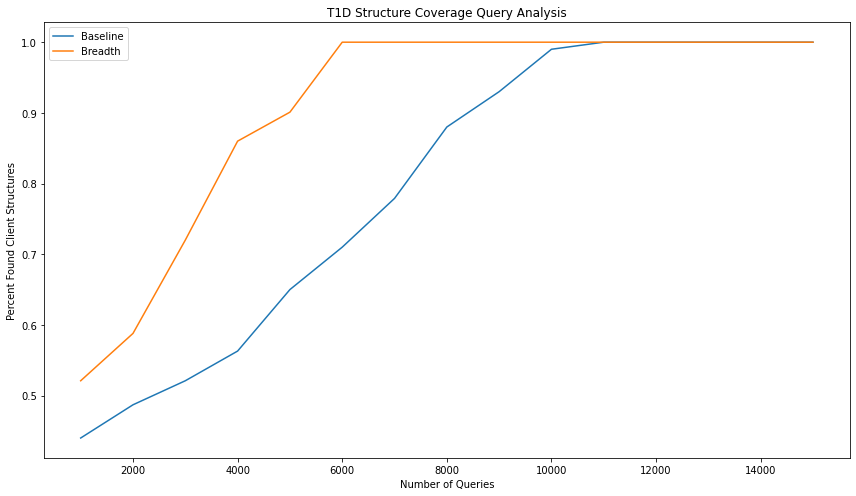

In [8]:
queries = base["Queries"]
structsBase = base["T1D Percent Found Structs B"]
structsCov = base["T1D Percent Found Structs C"]

plt.figure(figsize=(12, 7))
plt.title("T1D Structure Coverage Query Analysis")
plt.plot(queries, structsBase, label='Baseline')
plt.plot(queries, structsCov, label='Breadth')
plt.xlabel("Number of Queries")
plt.ylabel("Percent Found Client Structures")
plt.legend()

plt.tight_layout()
plt.savefig("T1D_Nonpriv_Structure_Coverage.png")

# Private Coverage

In [2]:
def summaryPrivRules(df, save):
    cps = sorted(list(set(df['Cp'])))
    lambdas = sorted(list(set(df['Lambda'])))
    epsilons = sorted(list(set(df['Epsilon'])), reverse=True)

    maxFR = max(df['Found Rules'])
    maxNR = max(df['Non Rules'])
    maxRules = maxFR + maxNR

    fig, axes = plt.subplots(figsize=(20, 20), nrows=len(cps), ncols=len(lambdas))
    row = 0
    col = 0
    for c in cps:
        col = 0
        for l in lambdas:
            cpdf = df.loc[df['Cp'] == c]
            subset = cpdf.loc[df['Lambda'] == l][['Found Rules', 'Non Rules']]
            FRErr = cpdf.loc[df['Lambda'] == l]['Found Rules Std']
            NRErr = cpdf.loc[df['Lambda'] == l]['Non Rules Std']

            ax = subset.plot(kind="bar", stacked=True, yerr=[FRErr, NRErr], ax=axes[row, col])

            ax.set_ylabel("Total Rules")
            ax.legend(['Found Rules', 'Non Rules'], loc='upper right')

            ax.set_title("Cp: " + str(c) + "; Lambda: " + str(l))
            ax.set_xlabel("Epsilon")
            ax.set_ylim(0, maxRules)

            ax.set_xticklabels(labels=epsilons, rotation=0, minor=False)
            handles, labels = ax.get_legend_handles_labels()
            col += 1
        row += 1
    fig.tight_layout()
    save = save.replace(".", "-")
    fig.savefig(save + "Summary_Rules_Nonrules")
    fig.show()
    


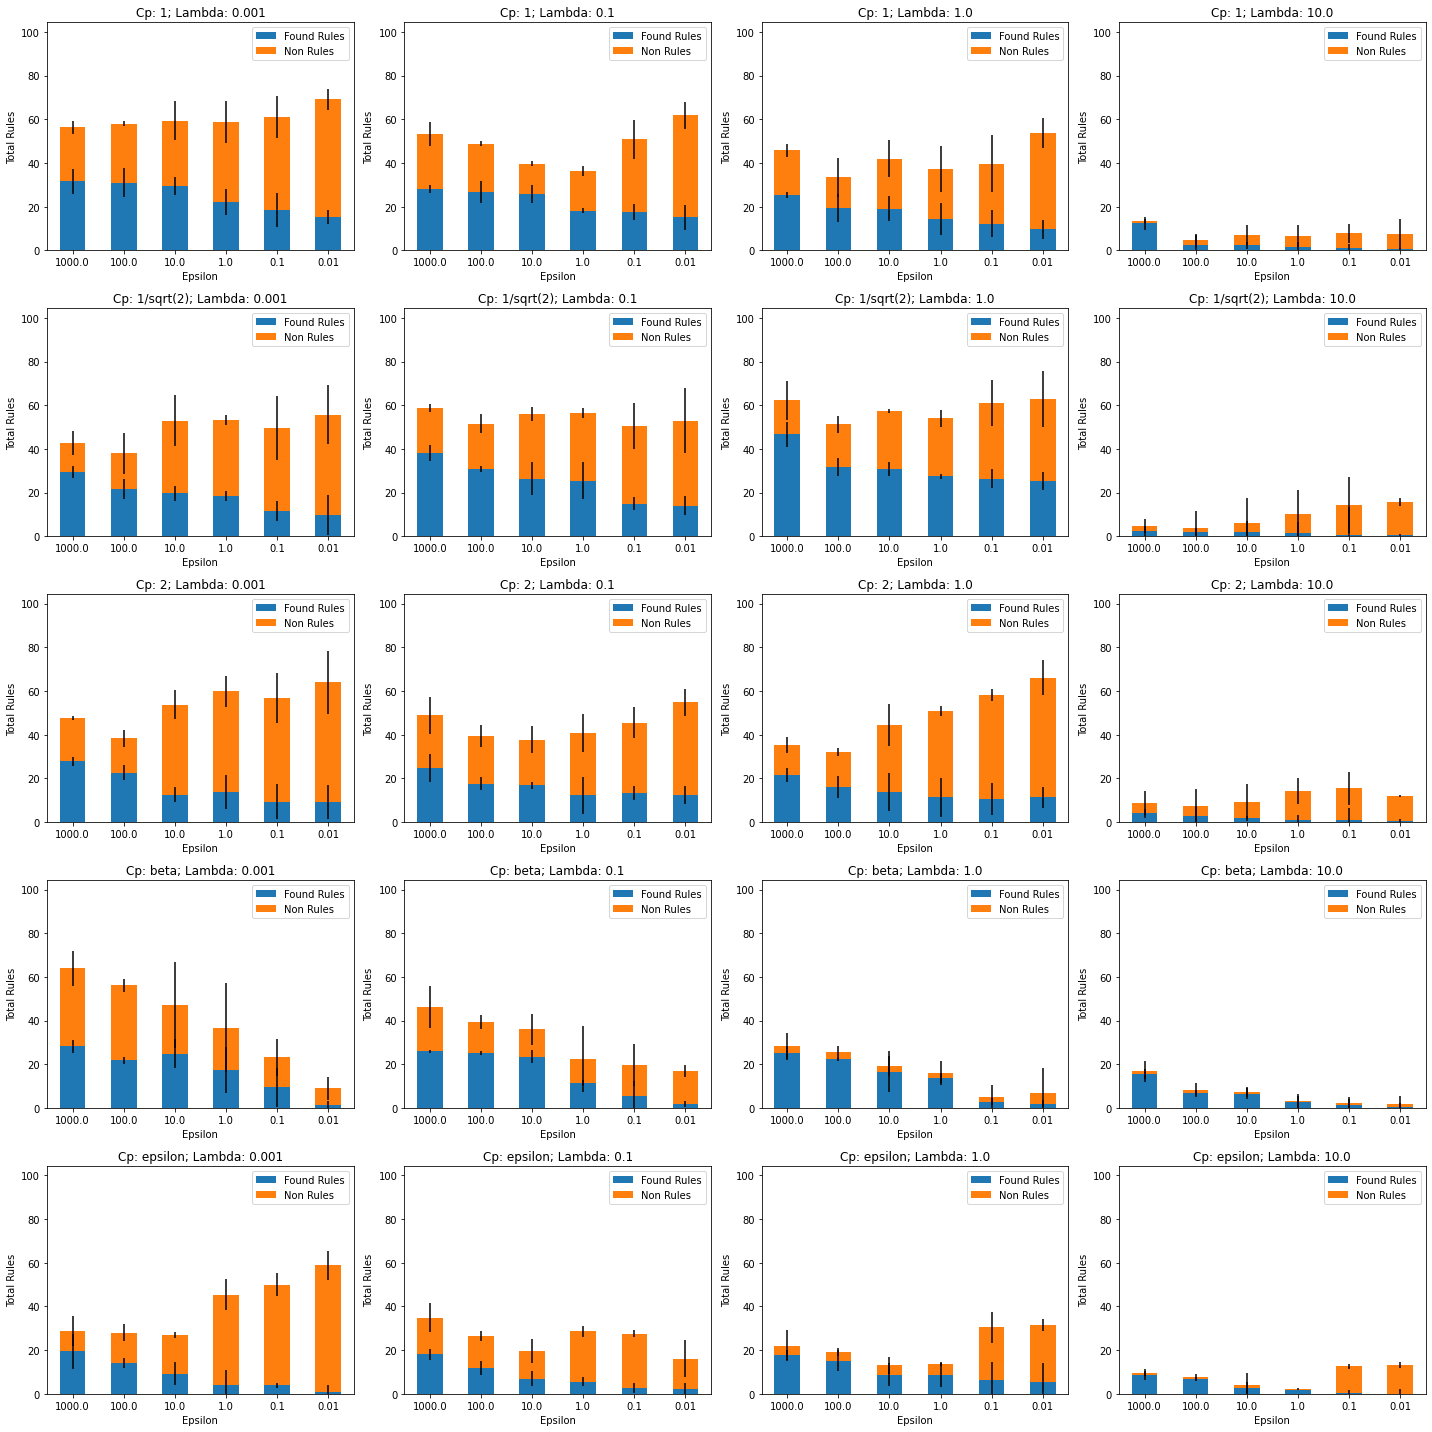

In [3]:
df = pd.read_csv('../Results/ICU_AveragedCoverageSummaryDF.csv')

summaryPrivRules(df, save="ICU_")

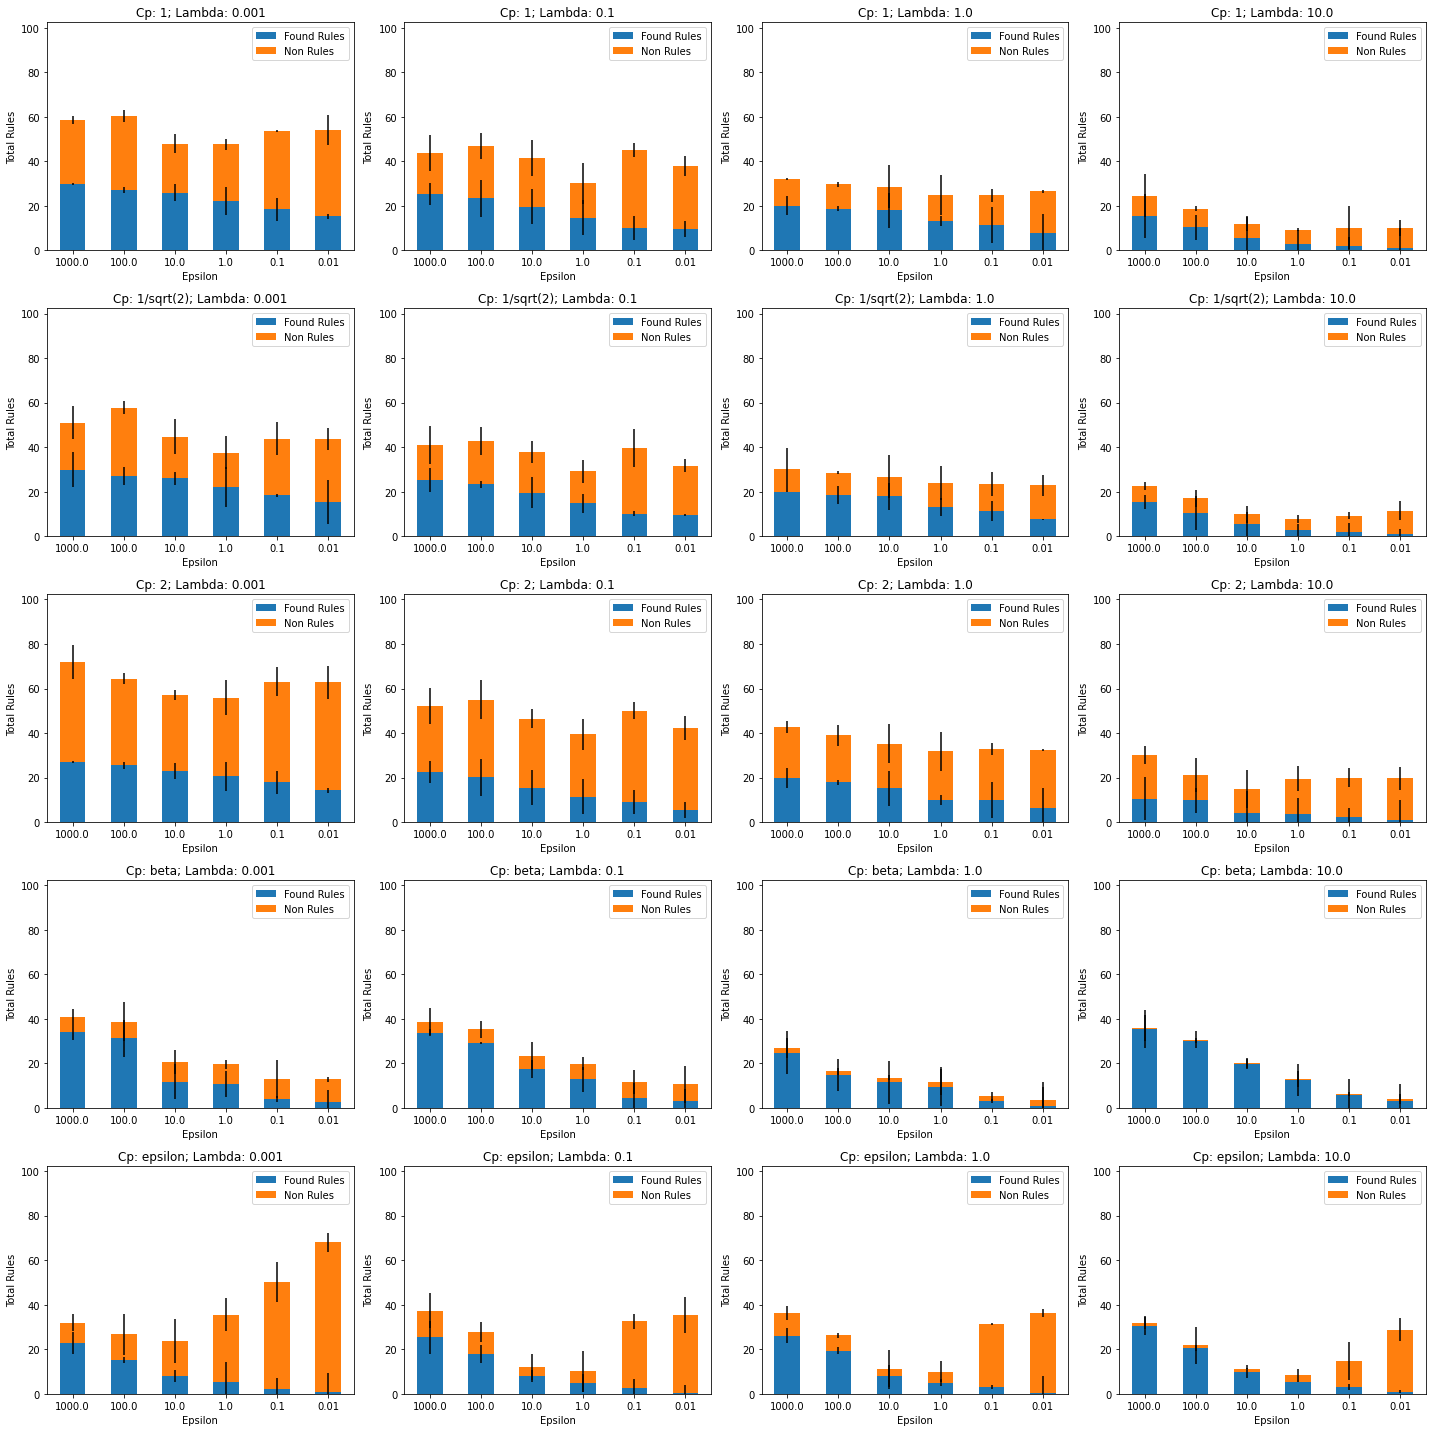

In [4]:
df = pd.read_csv('../Results/Sepsis_AveragedCoverageSummaryDF.csv')

summaryPrivRules(df, save="Sepsis_")

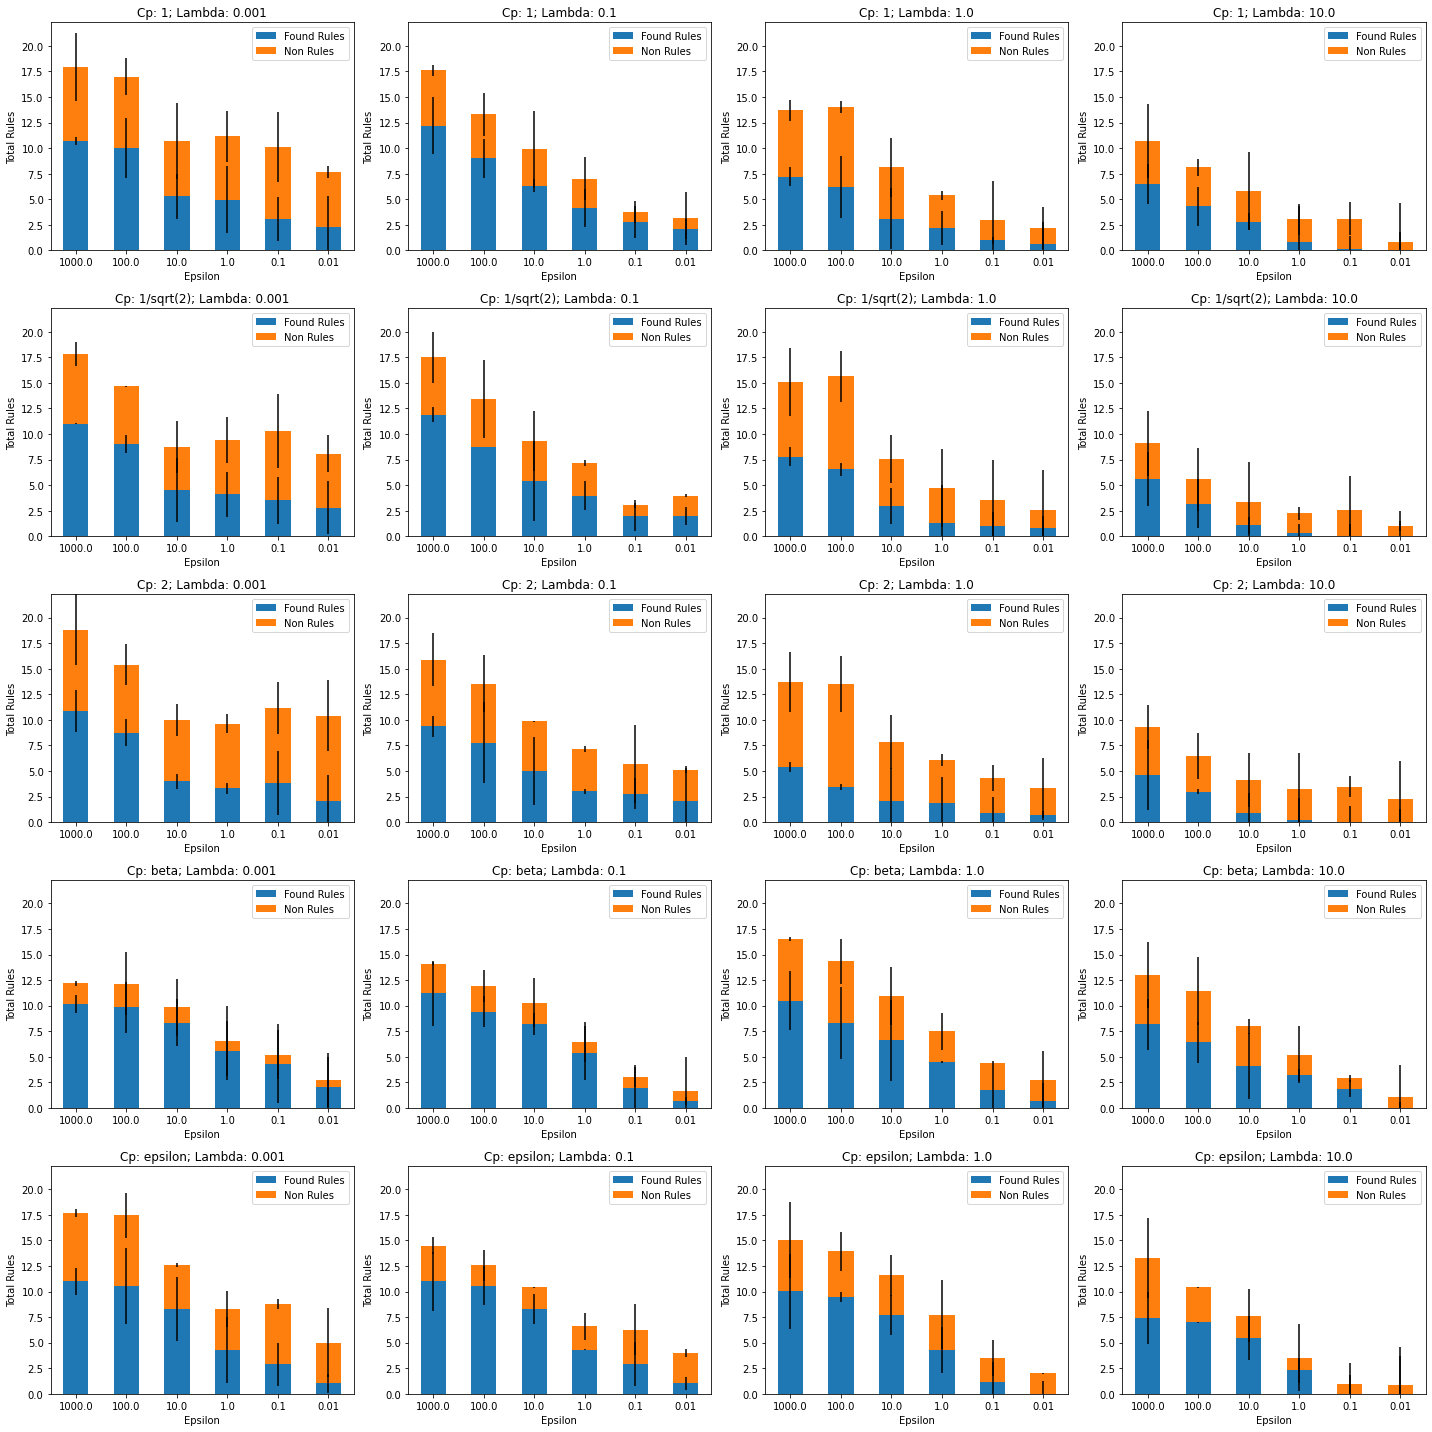

In [5]:
df = pd.read_csv('../Results/T1D_AveragedCoverageSummaryDF.csv')

summaryPrivRules(df, save="T1D_")

# Rule Quality